# DS证据理论
- 也叫做DS理论，能够给为解决不确定问题提供一定可靠原理
- 把多个不确定的信息源进行合理的融合，得到一个可靠的结论
- 类似于ML中的集成学习，综合多个弱学习器的结论得到一个可靠的强学习器

## 主要概念
- **X全域**：也叫做识别框架或者假设空间，它指的是所有可能的事件的集合。类比到机器学习，如果一个猫狗二分类问题，那么这个X全域就是属于猫或者属于狗。
- **基本概率**：在X全域中每个事件发生的可能性，并且这些可能事件的基本概率和为1。也就是猫狗二分类中，某一个样本属于猫或者狗的概率之和为1。
- **基本概率分配**：指的是一个弱分类器对该样本给出的基本概率的过程。
- **基本概率分配函数**：基本概率分配的函数过程中用的函数，称为`mass`函数；也可以理解为学习好的弱学习器

- mass函数：
$\begin{align}
\left\{\begin{matrix} 
 m(\varnothing) & = 0\\
 \sum\limits_{A\subseteq \Theta}m(A) & = 1
\end{matrix}\right. 
\nonumber
\end{align}$
$\Theta$表示X**全域**，如果$m(A)>0$称为**焦元**   
**信度函数**：Bel函数，指的是某假设的所有的子集的概率之和，即：
$\begin{align}
 Bel(A) = \sum\limits_{B\subseteq A}m(B)
 \nonumber
\end{align}$
**似然函数**：Pl函数，指的是与某假设交集不为空的概率之和，即：
$\begin{align}
Pl(A) = \sum\limits_{B\cap A\ne \varnothing }m(B)
\nonumber
\end{align}$

## Dempster合成规则
假设两个mass函数表示为m1和m2，那么Dempster合成规则（证据合成公式）表示为：
$\begin{align}
(m1\oplus m2)(A) =  \frac{1}{K} \sum\limits_{B\cap C=A}m1(B)\cdot m2(C)
\nonumber
\end{align}$
归一化系数K计算公式为：
$\begin{align}
K = \sum\limits_{B\cap C\ne \varnothing }m1(B)\cdot m2(C)
=1-\sum\limits_{B\cap C = \varnothing }m1(B)\cdot m2(C)
\nonumber
\end{align}$
扩展到多维时，多个mass函数下，K的求法为：
$\begin{align}
K = \sum\limits_{A1\cap A2\cap... \cap An\ne \varnothing }m1(A1)\cdot m2(A2)... mn(An)
=1-\sum\limits_{A1\cap A2\cap... \cap An = \varnothing }m1(A1)\cdot m2(A2)... mn(An)
\nonumber
\end{align}$
此时Dempster合成规则可以表示为：
$\begin{align}
(m1\oplus m2\oplus ...\oplus mn)(A)  =  
\frac{1}{K} \sum\limits_{A1\cap A2\cap ...\cap An=A}m1(A1)\cdot m2(A2)...mn(An)
\nonumber
\end{align}$

## 例题代码
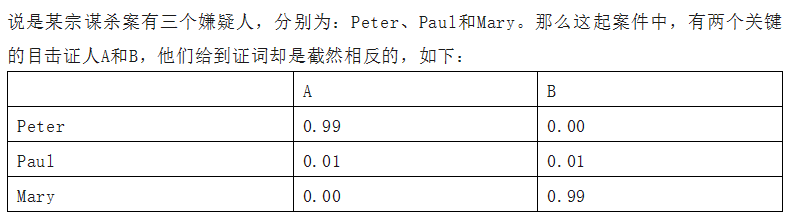  

归一化系数K：
$\begin{align}
K&=mA(Peter)\cdot mB(Peter)+mA(Paul)\cdot mB(Paul)+mA(Mary)\cdot mB(Mary) \nonumber \\
&=0.99\times 0.00+0.01\times 0.01+0.00\times 0.09 \nonumber\\
&=0.01 \nonumber
\end{align}$
Peter的组合mass函数：
$\begin{align}
(mA\oplus mB)(Peter)&=\frac{1}{K}\cdot mA(Peter)\cdot mB(Peter) \nonumber \\
&=\frac{1}{0.0001}\times 0.99\times 0.00=0.00 \nonumber
\end{align}$

Paul的组合mass函数为：
$\begin{align}
(mA\oplus mB)(Paul)&=\frac{1}{K}\cdot mA(Paul)\cdot mB(Paul) \nonumber \\
&=\frac{1}{0.0001}\times 0.01\times 0.01=1.00 \nonumber
\end{align}$

Mary的组合mass函数为：
$\begin{align}
(mA\oplus mB)(Mary)&=\frac{1}{K}\cdot mA(Mary)\cdot mB(Mary) \nonumber \\
&=\frac{1}{0.0001}\times 0.00\times 0.99=0.00 \nonumber
\end{align}$

In [1]:
import numpy as np
def ds(m1,m2):
    m = m1*m2
    k = m.sum()
    result = m/k
    return result

m1 = np.array([0.99,0.01,0.0])
m2 = np.array([0.0,0.01,0.99])
ds(m1=m1,m2=m2)

array([0., 1., 0.])